<a href="https://colab.research.google.com/github/dataskeptic/similarities/blob/main/TF_IDF_biology_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install spacy

In [2]:
!python -m spacy download pt_core_news_lg

2023-08-03 13:05:25.299682: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-03 13:05:27.301388: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 1.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')


In [3]:
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
import pandas as pd
import numpy as np
import nltk
import re
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
import spacy
nlp = spacy.load('pt_core_news_lg')

In [5]:
def to_lowercase(data):
    return [line.replace(line, line.lower()) for line in data]

def remove_stopwords(data):
    stop_words = set(nltk.corpus.stopwords.words('portuguese'))
    filtered_tokens = []

    for line in data:
        # tokenize the line with spaCy
        doc = nlp(line)

        # remove stopwords from the doc
        filtered_tokens_line = [token.text for token in doc if token.text.lower() not in stop_words]

        # join the remaining tokens back into a single string
        filtered_line = ' '.join(filtered_tokens_line)

        filtered_tokens.append(filtered_line)

    return filtered_tokens

def remove_punct(data):
    #regex para tudo que não for [A-Za-Z0-9] e espaçamento
    return [re.sub(r'[^\w\s]', ' ', str(line)) for line in data]


def lemmatize(data):
    lemmatizer = WordNetLemmatizer()
    lem_tokens = []
    for line in data:
        tokens = word_tokenize(line, language='portuguese')
        lem_line = []
        for token in tokens:
            lem_token = lemmatizer.lemmatize(token)
            lem_line.append(lem_token)
        lem_string = ' '.join(lem_line)
        lem_tokens.append(lem_string)
    return lem_tokens

def spell_checker(text):
    spell = SpellChecker(language='pt')
    words = text.split()
    corrected_text = []
    for word in words:
        if isinstance(word, str):
            corrected_word = spell.correction(word)
            if corrected_word is not None:
                corrected_text.append(corrected_word)
            else:
                corrected_text.append(word)
    return ' '.join(corrected_text)

def stem(data):
    stemmer = SnowballStemmer('portuguese')
    stem_tokens = []
    for line in data:
        tokens = word_tokenize(line, language='portuguese')
        stem_line = []
        for token in tokens:
            stem_token = stemmer.stem(token)
            stem_line.append(stem_token)
        stem_string = ' '.join(stem_line)
        stem_tokens.append(stem_string)
    return stem_tokens

def preprocess_text(data):

    data = remove_punct(data)
    data = to_lowercase(data)
    data = remove_stopwords(data)
    #data = lemmatize(data)
    data = [spell_checker(line) for line in data]
    data = stem(data)

    return data

In [ ]:
from spellchecker import SpellChecker

In [ ]:
!pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 11.7 MB/s eta 0:00:00


In [ ]:
def spell_checker(text):
    spell = SpellChecker(language='pt')
    words = text.split()
    corrected_text = []
    for word in words:
        if isinstance(word, str):
            corrected_word = spell.correction(word)
            if corrected_word is not None:
                corrected_text.append(corrected_word)
            else:
                corrected_text.append(word)
    return ' '.join(corrected_text)

# Example usage:
text_to_check = "Ola, eu gost de programacao em pythom. vc gosta de programarr como sabia voce aquil? mateu"
corrected_text = spell_checker(text_to_check)
print("Original Text:", text_to_check)
print("Corrected Text:", corrected_text)

NameError: ignored

In [ ]:
reference_answers.to_csv("drive/MyDrive/Colab Notebooks/PT_ASAG_2018_v2.0/preproces_reference_answers.csv")
student_answers.to_excel("drive/MyDrive/Colab Notebooks/PT_ASAG_2018_v2.0/preproces_student_answers_and_grades_clean.xlsx")

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

path_reference_answers = "drive/MyDrive/Colab Notebooks/PT_ASAG_2018_v2.0/preproces_reference_answers.csv"
path_student_answers = "drive/MyDrive/Colab Notebooks/PT_ASAG_2018_v2.0/preproces_student_answers_and_grades_clean.xlsx"

reference_answers = pd.read_csv(path_reference_answers)
student_answers = pd.read_excel(path_student_answers)

print(reference_answers)
print("---------------------------------------")
print(student_answers)

    Unnamed: 0  question_id  \
0            0           36   
1            1           36   
2            2           36   
3            3           37   
4            4           37   
5            5           37   
6            6           38   
7            7           38   
8            8           38   
9            9           39   
10          10           39   
11          11           39   
12          12           40   
13          13           40   
14          14           40   
15          15           41   
16          16           41   
17          17           41   
18          18           42   
19          19           42   
20          20           42   
21          21           43   
22          22           43   
23          23           44   
24          24           44   
25          25           44   
26          26           45   
27          27           45   
28          28           45   
29          29           46   
30          30           46   
31      

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

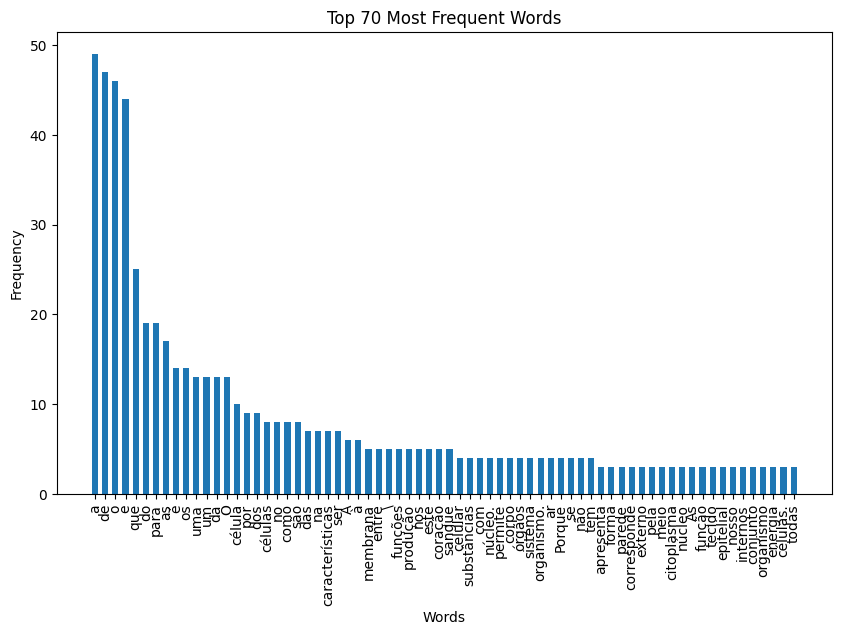

In [ ]:
all_words = [word for tokens in reference_answers['refans_text'] for word in tokens.split()]
word_frequency = Counter(all_words)
most_common_words = word_frequency.most_common()

top_n = 70  # You can adjust the number of most frequent words to plot
words, frequencies = zip(*most_common_words[:top_n])
plt.figure(figsize=(10, 6))

plt.bar(words, frequencies,width=0.6)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Most Frequent Words'.format(top_n))
plt.xticks(rotation=90)
plt.show()

In [ ]:
reference_answers['refans_preprocess'] = preprocess_text(reference_answers['refans_text'])

NameError: ignored

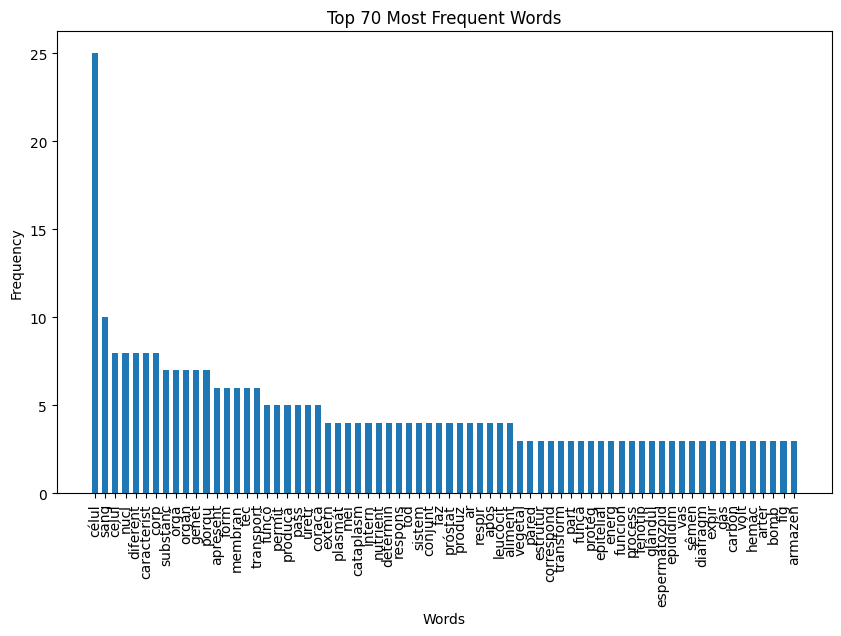

In [ ]:
all_words = [word for tokens in reference_answers['refans_preprocess'] for word in tokens.split()]
word_frequency = Counter(all_words)
most_common_words = word_frequency.most_common()

top_n = 70  # You can adjust the number of most frequent words to plot
words, frequencies = zip(*most_common_words[:top_n])
plt.figure(figsize=(10, 6))

plt.bar(words, frequencies,width=0.6)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Most Frequent Words'.format(top_n))
plt.xticks(rotation=90)
plt.show()

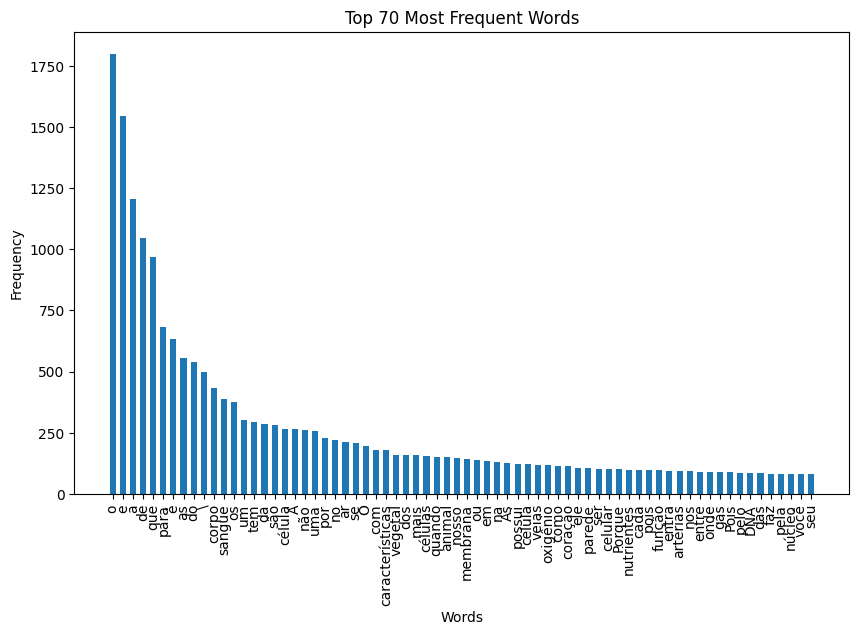

In [ ]:
all_words = [word for tokens in student_answers['answer_text'] for word in tokens.split()]
word_frequency = Counter(all_words)
most_common_words = word_frequency.most_common()

top_n = 70  # You can adjust the number of most frequent words to plot
words, frequencies = zip(*most_common_words[:top_n])
plt.figure(figsize=(10, 6))

plt.bar(words, frequencies,width=0.6)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Most Frequent Words'.format(top_n))
plt.xticks(rotation=90)
plt.show()

In [ ]:
student_answers['answer_preprocess'] = preprocess_text(student_answers['answer_text'])

In [ ]:
print([word for tokens in student_answers['answer_preprocess'] for word in tokens])

TypeError: ignored

In [ ]:
all_words = [word for tokens in student_answers['answer_preprocess'] for word in tokens.split()]
word_frequency = Counter(all_words)
most_common_words = word_frequency.most_common()

top_n = 70  # You can adjust the number of most frequent words to plot
words, frequencies = zip(*most_common_words[:top_n])
plt.figure(figsize=(10, 6))

plt.bar(words, frequencies,width=0.6)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Most Frequent Words'.format(top_n))
plt.xticks(rotation=90)
plt.show()

AttributeError: ignored

In [ ]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True)

In [ ]:
import numpy as np

Experimento: Verificando se há diferença em vetorizar as respostas dos alunos de uma por uma, ou todas as respostas da mesma pergunta de uma vez.

Resposta: Não.

In [ ]:
tfidf_similarity = pd.DataFrame()
for questionId in range(36, 51):
  temp_student_answers = student_answers[student_answers['question_id'] ==  questionId].copy()
  refans_tfidf = tfidf_vectorizer.fit_transform(reference_answers['refans_text'][reference_answers['question_id'] == questionId])

  for index, row in temp_student_answers.iterrows():
    temp_answers = tfidf_vectorizer.transform(temp_student_answers['answer_preprocess'])
    #print(temp_answers)
    tfidf_vectorizer_similarity = ([[cosine_similarity(temp_answer, ref_tfidf)[0][0] for ref_tfidf in refans_tfidf] for temp_answer in temp_answers])
    print(tfidf_vectorizer_similarity)
    similarities = [(max(tfidf_similarity), np.mean(tfidf_similarity), np.median(tfidf_similarity), min(tfidf_similarity)) for tfidf_similarity in tfidf_vectorizer_similarity]
    #similarities = max(tfidf_vectorizer_similarity)[0][0],np.mean(tfidf_vectorizer_similarity), np.median(tfidf_vectorizer_similarity), min(tfidf_vectorizer_similarity)[0][0]
    max_tfidf, mean_tfidf, median_tfidf, min_tfidf =  [similarity[0] for similarity in similarities],  [similarity[1] for similarity in similarities],  [similarity[2] for similarity in similarities],  [similarity[3] for similarity in similarities]

    temp_student_answers['max_similarity_tfidf'] = max_tfidf
    temp_student_answers['mean_similarity_tfidf'] = mean_tfidf
    temp_student_answers['median_similarity_tfidf'] = median_tfidf
    temp_student_answers['min_similarity_tfidf'] = min_tfidf
    print(temp_student_answers)
    break
  break
  tfidf_similarity = pd.concat([tfidf_similarity, temp_student_answers])
#print(tfidf_similarity)

[[0.6553503137724042, 0.089859154466379, 0.20903462926233235], [0.23522871192959022, 0.34435878545015597, 0.3013641990912701], [0.5942147258444648, 0.09447716018168827, 0.1699678328288925], [0.3303466147714773, 0.37297851930600634, 0.38324798259997206], [0.0, 0.0, 0.0], [0.34456648439085813, 0.16464084384764038, 0.10469716896759931], [0.6553503137724042, 0.089859154466379, 0.20903462926233235], [0.0, 0.0, 0.0], [0.46553643597108096, 0.21405195796454055, 0.27223662715915015], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.6589340964303654, 0.14468033551850817, 0.26028516345905317], [0.5722286424142417, 0.14131907970296642, 0.17973313571812288], [0.4652577194582742, 0.14084492951709854, 0.17913009966746016], [0.4749891827401943, 0.23885687572331676, 0.20903462926233235], [0.6589340964303654, 0.14468033551850817, 0.26028516345905317], [0.3231657909786588, 0.29349064711311235, 0.3110572803312315], [0.3882193468342447, 0.26462938484443144, 0.2602851634590531], [0.3095479352104128, 0.20573304892706662

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
def euclidean_to_similarity(euclidean_distance):
    similarity_score = 1 / (1 + euclidean_distance)
    return similarity_score

In [ ]:
ref = ['Eu me chamo mateus henrique ferreira de sousa', 'Eu me chamo mateus henrique ferreira de ', 'Aqui nao tem nada a ver']
ref = tfidf_vectorizer.fit_transform(ref)
lis = [euclidean_to_similarity(euclidean_distances(ref[0], ref_tfidf)[0][0]) for ref_tfidf in ref]
print(lis)

[1.0, 0.6862713215440417, 0.4142135623730951]


In [ ]:
tfidf_similarity = pd.DataFrame()

for questionId in range(36, 51):
  temp_student_answers = student_answers[student_answers['question_id'] ==  questionId].copy()
  refans_tfidf = tfidf_vectorizer.fit_transform(reference_answers['refans_text'][reference_answers['question_id'] == questionId])

  for index, row in temp_student_answers.iterrows():
    temp_answer = tfidf_vectorizer.transform([temp_student_answers['answer_preprocess'][index]])
    #temp_answer = temp_answer[0]
    #temp_answer = temp_answer.todense()[0]

    tfidf_cosine_similarity = ([(cosine_similarity(temp_answer, ref_tfidf)[0][0]) for ref_tfidf in refans_tfidf])
    tfidf_euclidian_similarity = ([euclidean_to_similarity(euclidean_distances(temp_answer, ref_tfidf)[0][0]) for ref_tfidf in refans_tfidf])
    print('--------------------------')
    print(temp_student_answers['answer_text'][index])
    print(temp_student_answers['answer_preprocess'][index], temp_student_answers['grade'][index] )
    print(tfidf_cosine_similarity)
    print(tfidf_euclidian_similarity)
    print('--------------------------')

    cosine_similarities = max(tfidf_cosine_similarity), np.mean(tfidf_cosine_similarity), np.median(tfidf_cosine_similarity), min(tfidf_cosine_similarity)
    euclidian_similarities = max(tfidf_euclidian_similarity), np.mean(tfidf_euclidian_similarity), np.median(tfidf_euclidian_similarity), min(tfidf_euclidian_similarity)


    temp_student_answers.loc[index, ('max_cosine_tfidf', 'mean_cosine_tfidf', 'median_cosine_tfidf', 'min_cosine_tfidf')] = cosine_similarities
    temp_student_answers.loc[index, ('max_euclidian_tfidf', 'mean_euclidian_tfidf', 'median_euclidian_tfidf', 'min_euclidian_tfidf')] = euclidian_similarities


  tfidf_similarity = pd.concat([tfidf_similarity, temp_student_answers])
print(tfidf_similarity)

Streaming output truncated to the last 5000 lines.
--------------------------
As arterias transportam o sangue rico em gás oxigênio, enquanto as veias transportam o sangue rico em gás carbonico
arter transport sang ric gás oxigêni enquant vei transport sang ric gás carbon 2
[0.33160880523851544, 0.44111125197103296]
[0.4637803631995876, 0.48608580156706527]
--------------------------
--------------------------
As artérias levam o sangue do coração para os tecidos e as veias do corpo para o coração
artér lev sang coraçã tec vei corp coraçã 2
[0.6864990126768267, 0.48678299850158535]
[0.558087236863678, 0.496738713478347]
--------------------------
--------------------------
As artérias conduz sangue por todo o corpo e as veias bombeia para o coração.
artér conduz sang tod corp vei bomb coraçã 2
[0.5015428228816697, 0.6468758372032732]
[0.5003863019461334, 0.5433643257907698]
--------------------------
--------------------------
Artérias: carrega o sangue que sai do coração, para todas a

In [ ]:
mean = tfidf_similarity['max_cosine_tfidf'].mean()
std =  tfidf_similarity['max_cosine_tfidf'].std()

wrongs = [ similarity[similarity['max_cosine_tfidf'] < (mean - std)]  for similarity in tfidf_similarity]

print(wrongs)


TypeError: ignored

In [ ]:
tfidf_similarity = pd.DataFrame()

for questionId in range(36, 51):
  temp_student_answers = student_answers[student_answers['question_id'] ==  questionId].copy()
  refans_tfidf = tfidf_vectorizer.fit_transform(reference_answers['refans_text'][reference_answers['question_id'] == questionId])
  print(refans_tfidf)
  for index, row in temp_student_answers.iterrows():
    temp_answer = tfidf_vectorizer.transform([temp_student_answers['answer_preprocess'][index]])[0]
    #temp_answer = temp_answer[0]
    #temp_answer = temp_answer.todense()[0]

    tfidf_cosine_similarity = ([cosine_similarity(temp_answer, ref_tfidf)[0][0] for ref_tfidf in refans_tfidf])
    tfidf_euclidian_similarity = ([euclidean_distances(temp_answer, ref_tfidf)[0][0] for ref_tfidf in refans_tfidf])

    print(tfidf_cosine_similarity)
    print(tfidf_euclidian_similarity)

    cosine_similarities = max(tfidf_cosine_similarity), np.mean(tfidf_cosine_similarity), np.median(tfidf_cosine_similarity), min(tfidf_cosine_similarity)


    temp_student_answers.loc[index, ('max_cosine_tfidf', 'mean_cosine_tfidf', 'median_cosine_tfidf', 'min_cosine_tfidf')] = cosine_similarities


  tfidf_similarity = pd.concat([tfidf_similarity, temp_student_answers])
print(tfidf_similarity)

  (0, 15)	0.2164469633833914
  (0, 16)	0.16461349467164785
  (0, 8)	0.2164469633833914
  (0, 19)	0.2164469633833914
  (0, 24)	0.2164469633833914
  (0, 7)	0.2164469633833914
  (0, 17)	0.4328939267667828
  (0, 2)	0.3292269893432957
  (0, 30)	0.3292269893432957
  (0, 1)	0.4328939267667828
  (0, 6)	0.3835111900522605
  (1, 23)	0.2719769548333164
  (1, 21)	0.2719769548333164
  (1, 14)	0.2719769548333164
  (1, 10)	0.3576170112988455
  (1, 5)	0.3576170112988455
  (1, 29)	0.2719769548333164
  (1, 13)	0.3576170112988455
  (1, 11)	0.3576170112988455
  (1, 3)	0.2719769548333164
  (1, 22)	0.2719769548333164
  (1, 6)	0.2112143677790474
  (2, 31)	0.22741312412302542
  (2, 9)	0.22741312412302542
  (2, 28)	0.22741312412302542
  (2, 12)	0.22741312412302542
  (2, 26)	0.22741312412302542
  (2, 20)	0.22741312412302542
  (2, 18)	0.22741312412302542
  (2, 4)	0.22741312412302542
  (2, 25)	0.22741312412302542
  (2, 27)	0.22741312412302542
  (2, 0)	0.22741312412302542
  (2, 23)	0.17295354257190265
  (2, 21)	0.

NameError: ignored

In [ ]:
def similarity_to_score(similarity):
    if similarity <= 0.30:
        score = 0
    elif similarity < 0.45:
        score = 1
    elif similarity < 0.60:
        score = 2
    else:
        score = 3
    return score

tfidf_similarity[['max_grade_tfidf', 'mean_grade_tfidf', 'median_grade_tfidf', 'min_grade_tfidf']] = tfidf_similarity[['max_similarity_tfidf','mean_similarity_tfidf', 'median_similarity_tfidf', 'min_similarity_tfidf']].applymap(similarity_to_score)
print(tfidf_similarity)


      question_id                                        answer_text  grade  \
0              36  A célula animal: e a célula vegetal: É de vege...      0   
1              36       As células animais morrem e as vegetais não.      0   
2              36  Célula animal, possui DNA, e a célula vegetal ...      0   
3              36  a célula vegetal tem membrana plasmática e a a...      0   
4              36                                            não sei      0   
...           ...                                                ...    ...   
2961           50      Ela filtra o sangue quando rins não funciona.      3   
2962           50  A hemodiálise é um processo no qual uma máquin...      3   
2963           50  A hemodiálise é um procedimento através do qua...      3   
2964           50     Filtra e limpa o sangue através de uma maquina      3   
2965           50  Limpa e filtra o sangue, substituindo a função...      3   

                                      answer_prepro

In [ ]:
tfidf_similarity.to_csv('drive/MyDrive/Colab Notebooks/PT_ASAG_2018_v2.0/tf_idf_similarities.csv', index=False)

In [ ]:
from sklearn.metrics import cohen_kappa_score

In [ ]:
Kappa_max = cohen_kappa_score(tfidf_similarity['grade'], tfidf_similarity['max_grade_tfidf'])
Kappa_mean = cohen_kappa_score(tfidf_similarity['grade'], tfidf_similarity['mean_grade_tfidf'])
Kappa_median = cohen_kappa_score(tfidf_similarity['grade'], tfidf_similarity['median_grade_tfidf'])
Kappa_min = cohen_kappa_score(tfidf_similarity['grade'], tfidf_similarity['min_grade_tfidf'])


# Print the Cohen's Kappa metric
print("Max Cohen's Kappa:", Kappa_max)
print("Mean Cohen's Kappa:", Kappa_mean)
print("Median Cohen's Kappa:", Kappa_median)
print("Min Cohen's Kappa:", Kappa_min)

Max Cohen's Kappa: 0.18783326936674338
Mean Cohen's Kappa: 0.11461396956447611
Median Cohen's Kappa: 0.11369783732819971
Min Cohen's Kappa: 0.030360479027956022


In [ ]:
zero = 0
um = 0
dois = 0
tres = 0

def count_result(result):
    global zero, um, dois, tres
    if result == 0:
        zero = zero + 1
    elif result == 1:
        um = um + 1
    elif result == 2:
        dois = dois + 1
    elif result == 3:
        tres = tres + 1
    return result

tfidf_similarity['max_grade_tfidf'].apply(count_result)
print(zero, um, dois, tres)

1130 844 808 184


In [ ]:
zero = 0
um = 0
dois = 0
tres = 0

def count_result(result):
    global zero, um, dois, tres
    if result == 0:
        zero = zero + 1
    elif result == 1:
        um = um + 1
    elif result == 2:
        dois = dois + 1
    elif result == 3:
        tres = tres + 1
    return result

tfidf_similarity['grade'].apply(count_result)
print(zero, um, dois, tres)

1083 844 632 407
